
# Ejercicios de Manejo e Instalación de Paquetes en Python (Jupyter Notebook)

Alumno: _DIEGO_  





In [11]:

# --- Importación de paquetes necesarios ---
import os
import re
from pathlib import Path
from urllib.request import urlretrieve

import numpy as np
import pandas as pd

# Para verificar o graficar
import matplotlib.pyplot as plt

print("Versión de Python:",  f"{os.sys.version_info.major}.{os.sys.version_info.minor}.{os.sys.version_info.micro}")
print("Versión de pandas:", pd.__version__)
print("Versión de numpy:",  np.__version__)


Versión de Python: 3.12.7
Versión de pandas: 2.2.2
Versión de numpy: 1.26.4


## 1) Función `lambda` para obtener la raíz cuadrada de un número

In [12]:


sqrt_lambda = lambda x: x ** 0.5

# Ejemplos de uso
valores = [0, 2, 4, 9, 16, 144]
resultados = [(v, sqrt_lambda(v)) for v in valores]
for v, r in resultados:
    print(f"sqrt_lambda({v}) = {r}")


sqrt_lambda(0) = 0.0
sqrt_lambda(2) = 1.4142135623730951
sqrt_lambda(4) = 2.0
sqrt_lambda(9) = 3.0
sqrt_lambda(16) = 4.0
sqrt_lambda(144) = 12.0


## 2) Cambiar directorio a uno de tu preferencia

In [13]:

PREFERRED_DIR = r"C:\Users\diego\OneDrive\Desktop\ebac"  

if PREFERRED_DIR:
    target = Path(PREFERRED_DIR).expanduser()
    target.mkdir(parents=True, exist_ok=True)
    os.chdir(target)
else:
    target = Path.cwd()

print("Directorio de trabajo:", target.resolve())


Directorio de trabajo: C:\Users\diego\OneDrive\Desktop\ebac


## 3) Descargar el CSV “Height of Male and Female by Country 2022.csv”

In [14]:

from urllib.request import urlretrieve
from pathlib import Path

try:
    print("Descargando...")
    # Usando una de las soluciones anteriores para la ruta
    DATASET_URL = r"C:\Users\diego\OneDrive\Desktop\ebac\dataset.csv"  # Ejemplo con raw string
    dest_path = Path("dataset.csv")  # Asegúrate de definir esto
    
    urlretrieve(DATASET_URL, dest_path.name)
    print("Descarga completa:", dest_path.resolve())
except Exception as e:
    print("No se pudo descargar automáticamente. Error:", e)
    print("Coloca manualmente el archivo en:", Path.cwd() / dest_path.name)
else:
    print("No se proporcionó URL. Si ya tienes el archivo, colócalo en:", Path.cwd())
    print("Nombre esperado:", dest_path.name)


Descargando...
No se pudo descargar automáticamente. Error: <urlopen error unknown url type: c>
Coloca manualmente el archivo en: C:\Users\diego\OneDrive\Desktop\ebac\dataset.csv


## 4) Leer el archivo CSV

In [15]:

import pandas as pd
from pathlib import Path

# Configuración inicial
FILE_NAME = "Height of Male and Female by Country 2022.csv"
dest_path = Path(FILE_NAME)

# Lista de codificaciones a probar (ordenadas por probabilidad)
encodings = ["utf-8", "utf-8-sig", "latin-1", "cp1252", "iso-8859-1"]

def load_height_data(file_path):
    """
    Carga el archivo CSV de alturas, probando múltiples codificaciones.
    
    Args:
        file_path (Path): Ruta al archivo CSV
        
    Returns:
        pd.DataFrame: DataFrame con los datos cargados
        
    Raises:
        FileNotFoundError: Si el archivo no existe
        ValueError: Si no se puede leer con ninguna codificación
    """
    # Verificar existencia del archivo
    if not file_path.exists():
        raise FileNotFoundError(
            f"No se encontró el archivo: {file_path.resolve()}\n"
            "Por favor descarga el archivo y colócalo en el directorio de trabajo.\n"
            f"Nombre requerido: '{FILE_NAME}'"
        )


## 5) Imprimir las primeras 50 líneas

In [16]:

import pandas as pd
from pathlib import Path

# 1. Definición de la función de carga mejorada
def load_height_data(file_path):
    """
    Carga el archivo CSV con manejo robusto de errores
    """
    try:
        # Intentar múltiples codificaciones comunes
        encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']
        
        for encoding in encodings:
            try:
                df = pd.read_csv(file_path, encoding=encoding)
                print(f"✓ Archivo cargado correctamente con codificación: {encoding}")
                return df
            except UnicodeDecodeError:
                continue
        
        # Si todas las codificaciones fallan
        raise ValueError("No se pudo leer el archivo con ninguna codificación estándar")
        
    except FileNotFoundError:
        raise FileNotFoundError(f"El archivo {file_path.name} no se encontró")
    except Exception as e:
        raise ValueError(f"Error al cargar el archivo: {str(e)}")

# 2. Configuración y ejecución
FILE_NAME = "Height of Male and Female by Country 2022.csv"
dest_path = Path(FILE_NAME)

try:
    # Cargar los datos
    height_data = load_height_data(dest_path)
    
    # Verificar los datos cargados correctamente
    if height_data is not None:
        print("="*60)
        print("PRIMERAS 50 LÍNEAS DEL DATASET".center(60))
        print("="*60)
        print(height_data.head(50))
    else:
        print("Error: No se pudieron cargar los datos")

except Exception as e:
    print(f"\n❌ Error: {str(e)}")
    print("\nPosibles soluciones:")
    print("1. Verifica que el archivo existe en la ubicación correcta")
    print("2. Comprueba que el archivo no esté corrupto")
    print("3. Prueba abrir el archivo con Excel y guardarlo como UTF-8 CSV")


✓ Archivo cargado correctamente con codificación: utf-8
               PRIMERAS 50 LÍNEAS DEL DATASET               
    Rank                      Country Name  Male Height in Cm  \
0      1                       Netherlands             183.78   
1      2                        Montenegro             183.30   
2      3                           Estonia             182.79   
3      4            Bosnia and Herzegovina             182.47   
4      5                           Iceland             182.10   
5      6                           Denmark             181.89   
6      7                    Czech Republic             181.19   
7      8                            Latvia             181.17   
8      9                          Slovakia             181.02   
9     10                          Slovenia             180.98   
10    11                           Ukraine             180.98   
11    12                           Croatia             180.76   
12    13                            Se

## 6) Media, mínima y máxima para alturas de hombres y mujeres (dataset completo)

In [17]:

# Identificamos columnas que se refieren a altura de hombres y mujeres.
# Como los nombres de columnas varían según la fuente, usamos búsqueda flexible por palabras clave.
import pandas as pd
from pathlib import Path
import re

# 1. Primero cargamos los datos
def cargar_datos():
    """Carga el dataset de alturas desde el archivo CSV"""
    FILE_NAME = "Height of Male and Female by Country 2022.csv"
    dest_path = Path(FILE_NAME)
    
    try:
        # Intentar múltiples codificaciones
        encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']
        
        for encoding in encodings:
            try:
                df = pd.read_csv(dest_path, encoding=encoding)
                print(f"✓ Datos cargados correctamente con codificación: {encoding}")
                return df
            except UnicodeDecodeError:
                continue
        
        raise ValueError("No se pudo leer el archivo con ninguna codificación estándar")
        
    except FileNotFoundError:
        raise FileNotFoundError(f"El archivo {FILE_NAME} no se encontró")
    except Exception as e:
        raise ValueError(f"Error al cargar el archivo: {str(e)}")

# 2. Función para detectar columnas (versión mejorada)
def detectar_columnas_altura(df):
    """Detecta automáticamente las columnas relevantes"""
    cols = [str(c).strip() for c in df.columns]
    
    patron_altura = re.compile(r"(height|altura|estatura)", re.IGNORECASE)
    patron_hombre = re.compile(r"\b(male|men|hombre)\b", re.IGNORECASE)
    patron_mujer = re.compile(r"\b(female|women|mujer)\b", re.IGNORECASE)
    patron_pais = re.compile(r"\b(country|pa[íi]s)\b", re.IGNORECASE)

    resultados = {'pais': None, 'hombre': None, 'mujer': None}
    
    for col in cols:
        if patron_altura.search(col):
            if patron_hombre.search(col):
                resultados['hombre'] = col
            elif patron_mujer.search(col):
                resultados['mujer'] = col
        elif patron_pais.search(col):
            resultados['pais'] = col
    
    if resultados['hombre'] is None or resultados['mujer'] is None:
        raise ValueError(f"No se detectaron columnas de altura. Columnas disponibles: {cols}")
    
    return resultados['pais'], resultados['hombre'], resultados['mujer']

# 3. Función para calcular estadísticas
def calcular_estadisticas(df, col_hombres, col_mujeres):
    """Calcula las estadísticas descriptivas"""
    stats = pd.DataFrame({
        'Hombres': {
            'Media': df[col_hombres].mean(),
            'Mínimo': df[col_hombres].min(),
            'Máximo': df[col_hombres].max(),
            'Países válidos': df[col_hombres].notna().sum()
        },
        'Mujeres': {
            'Media': df[col_mujeres].mean(),
            'Mínimo': df[col_mujeres].min(),
            'Máximo': df[col_mujeres].max(),
            'Países válidos': df[col_mujeres].notna().sum()
        }
    }).round(2)
    
    return stats

# 4. Ejecución principal
try:
    # Cargar datos
    df = cargar_datos()
    
    # Detectar columnas
    col_pais, col_hombres, col_mujeres = detectar_columnas_altura(df)
    
    print("\n🔍 Columnas detectadas:")
    print(f"- País: {col_pais}")
    print(f"- Altura hombres: {col_hombres}")
    print(f"- Altura mujeres: {col_mujeres}")
    
    # Calcular estadísticas
    stats = calcular_estadisticas(df, col_hombres, col_mujeres)
    
    print("\n📊 Estadísticas de altura por género (en cm):")
    display(stats)
    
except Exception as e:
    print(f"\n❌ Error: {str(e)}")
    if 'df' not in locals():
        print("Posible solución: Asegúrate de que el archivo CSV esté en el directorio correcto")
        print(f"Nombre esperado: 'Height of Male and Female by Country 2022.csv'")
   

✓ Datos cargados correctamente con codificación: utf-8

🔍 Columnas detectadas:
- País: Country Name
- Altura hombres: Male Height in Ft
- Altura mujeres: Female Height in Ft

📊 Estadísticas de altura por género (en cm):


,Hombres,Mujeres
Media,5.68,5.28
Mínimo,5.25,4.95
Máximo,6.03,5.59
Países válidos,199.00,199.00


## 7) Obtener la data de alturas de tu país de origen

In [18]:

import pandas as pd

PAIS_ORIGEN = "Mexico"  # Cambia al país que necesites
COL_PAIS = 'Country Name'
COL_ALTURA_H = 'Male Height in Cm'
COL_ALTURA_M = 'Female Height in Cm'


try:
    # Filtrado exacto (case sensitive)
    df_pais = df[df[COL_PAIS] == PAIS_ORIGEN].copy()
    
    if df_pais.empty:
        # Búsqueda aproximada si no hay coincidencia exacta
        paises_similares = [p for p in df[COL_PAIS].unique() 
                          if isinstance(p, str) and PAIS_ORIGEN.lower() in p.lower()]
        raise ValueError(f"País no encontrado. ¿Quizás quisiste decir: {paises_similares[:3] if paises_similares else 'Ninguno similar'}?")
    
    # Mostrar resultados formateados
    print(f"\n📊 Datos para {PAIS_ORIGEN}:")
    print(f"👨 Altura hombres: {df_pais[COL_ALTURA_H].values[0]} cm")
    print(f"👩 Altura mujeres: {df_pais[COL_ALTURA_M].values[0]} cm")
    print(f"🏆 Ranking mundial: #{df_pais['Rank'].values[0]}")
    
except Exception as e:
    print(f"Error: {e}")
    print("\nℹ️ Columnas disponibles:", list(df.columns))


📊 Datos para Mexico:
👨 Altura hombres: 170.29 cm
👩 Altura mujeres: 157.9 cm
🏆 Ranking mundial: #139


### (Opcional) Gráfico rápido para validar columnas

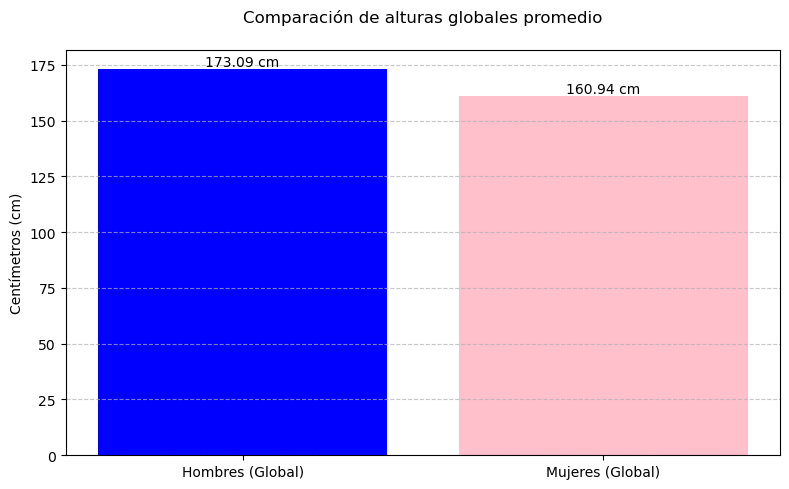

In [19]:
import matplotlib.pyplot as plt

col_male = 'Male Height in Cm'
col_female = 'Female Height in Cm'

# Medias con manejo robusto de valores faltantes
media_h = pd.to_numeric(df[col_male], errors='coerce').dropna().mean()
media_m = pd.to_numeric(df[col_female], errors='coerce').dropna().mean()

# Grafico
plt.figure(figsize=(8, 5))
bars = plt.bar(['Hombres (Global)', 'Mujeres (Global)'], [media_h, media_m], 
               color=['blue', 'pink'])

# Valores exactos en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f} cm',
             ha='center', va='bottom')

plt.title('Comparación de alturas globales promedio', pad=20)
plt.ylabel('Centímetros (cm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()